In [0]:
!git clone https://github.com/jantic/DeOldify.git DeOldify
  

Cloning into 'DeOldify'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 957 (delta 1), reused 9 (delta 0), pack-reused 943
Receiving objects: 100% (957/957), 68.40 MiB | 11.74 MiB/s, done.
Resolving deltas: 100% (288/288), done.


In [0]:
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch
print(torch.__version__)
print(torch.cuda.is_available())

0.4.1
True


In [0]:
cd DeOldify

/content/DeOldify


In [0]:
!pip install -e .

Obtaining file:///content/DeOldify
    100% |████████████████████████████████| 1.5MB 13.1MB/s 
    100% |████████████████████████████████| 184kB 27.2MB/s 
    100% |████████████████████████████████| 3.6MB 9.7MB/s 
    100% |████████████████████████████████| 112kB 31.4MB/s 
    100% |████████████████████████████████| 71kB 28.6MB/s 
    100% |████████████████████████████████| 11.6MB 3.7MB/s 
    100% |████████████████████████████████| 92kB 26.2MB/s 
    100% |████████████████████████████████| 61kB 21.6MB/s 
    100% |████████████████████████████████| 81kB 26.8MB/s 
  Running setup.py bdist_wheel for bcolz ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done
  Stored in directory: /root/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
  Running setup.py bdist_wheel for fe

In [0]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [0]:
!pip install PyDrive

In [0]:
!pip install Pillow

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import multiprocessing
from torch import autograd
from fastai.transforms import TfmType
from fasterai.transforms import *
from fastai.conv_learner import *
from fasterai.images import *
from fasterai.dataset import *
from fasterai.visualize import *
from fasterai.callbacks import *
from fasterai.loss import *
from fasterai.modules import *
from fasterai.training import *
from fasterai.generators import *
from fastai.torch_imports import *
from fasterai.filters import *
from pathlib import Path
from itertools import repeat
from google.colab import drive
from IPython.display import Image
import tensorboardX
torch.cuda.set_device(0)
plt.style.use('dark_background')
torch.backends.cudnn.benchmark=True

In [0]:

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1mRRvS3WIHPdp36G0yc1jC0XI6i-Narv6'})
download.GetContentFile('pretrained_weights.h5')

In [0]:
from google.colab import drive
drive.mount('/content/drive')
!mkdir "/content/drive/My Drive/deOldifyImages"
!mkdir "/content/drive/My Drive/deOldifyImages/results"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
mkdir: cannot create directory ‘/content/drive/My Drive/deOldifyImages’: File exists
mkdir: cannot create directory ‘/content/drive/My Drive/deOldifyImages/results’: File exists


In [0]:

weights_path = 'pretrained_weights.h5'
results_dir='/content/drive/My Drive/deOldifyImages/results'

#The higher the render_factor, the more GPU memory will be used and generally images will look better.  
#11GB can take a factor of 42 max.  Performance generally gracefully degrades with lower factors, 
#though you may also find that certain images will actually render better at lower numbers.  
#This tends to be the case with the oldest photos.
render_factor=42
filters = [Colorizer34(gpu=0, weights_path=weights_path)]
vis = ModelImageVisualizer(filters, render_factor=render_factor, results_dir=results_dir)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 82407884.49it/s]


In [0]:
#ample picture to try.
# NOTE: All the jpg files cloned from the git repo are corrupted. Must download yourself.
!wget "https://media.githubusercontent.com/media/jantic/DeOldify/master/test_images/abe.jpg" -O "abe2.jpg"

--2018-12-30 04:10:05--  https://media.githubusercontent.com/media/jantic/DeOldify/master/test_images/abe.jpg
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13981 (14K) [image/jpeg]
Saving to: ‘abe2.jpg’

abe2.jpg            100%[===================>]  13.65K  --.-KB/s    in 0.01s   

2018-12-30 04:10:06 (1.13 MB/s) - ‘abe2.jpg’ saved [13981/13981]



[autoreload of PIL.Image failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: cannot import name 'py3'
]
[autoreload of PIL._binary failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: cannot import name 'py3'
]
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:86: RuntimeWarning: The _imaging extension was built for another version of Pillow or PIL:
Core version: 4.0.0
Pillow version: 5.3.0
  warnings.warn(str(v), RuntimeWarning)
[autoreload of PIL.Image failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: The _imaging extension was built for a

    100% |████████████████████████████████| 5.7MB 7.3MB/s 
  Found existing installation: Pillow 5.3.0
    Uninstalling Pillow-5.3.0:
      Successfully uninstalled Pillow-5.3.0


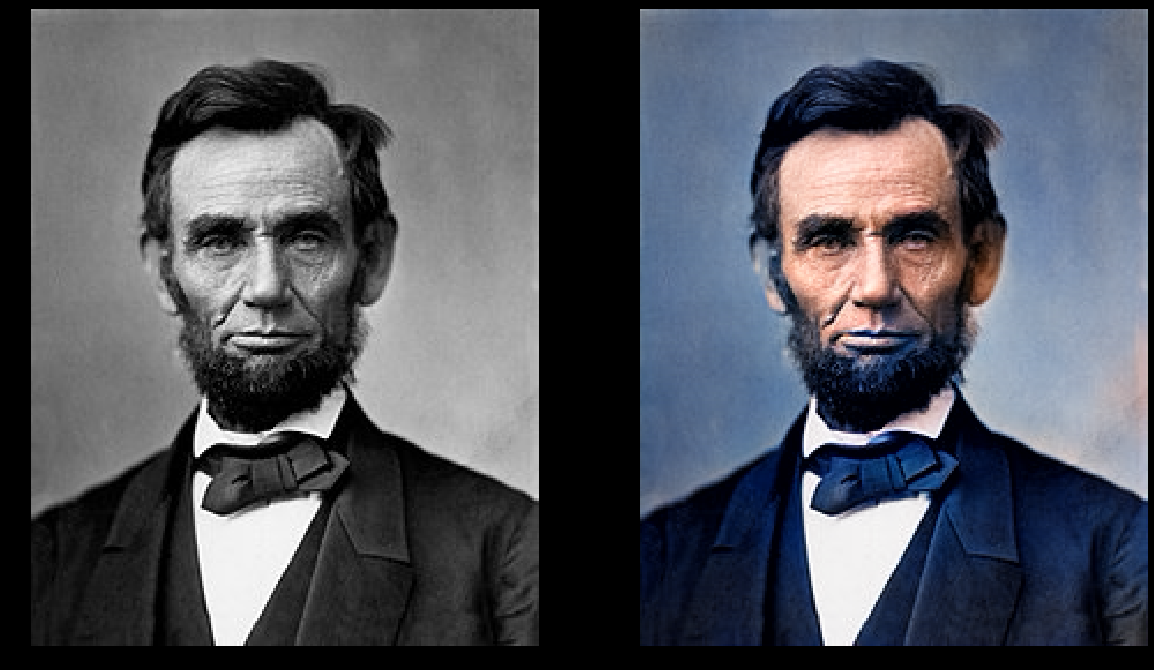

In [0]:

# Work around with Pillow being preinstalled on these Colab VMs, causing conflicts otherwise.
!pip install Pillow==4.1.1
# %matplotlib inline
vis.plot_transformed_image('abe2.jpg', render_factor=25)

In [0]:
!wget "https://media.githubusercontent.com/media/jantic/DeOldify/master/test_images/TV1930s.jpg" -O "family_TV.jpg"

--2018-12-22 18:14:58--  https://media.githubusercontent.com/media/jantic/DeOldify/master/test_images/TV1930s.jpg
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88662 (87K) [image/jpeg]
Saving to: ‘family_TV.jpg’

family_TV.jpg       100%[===================>]  86.58K  --.-KB/s    in 0.02s   

2018-12-22 18:14:59 (3.43 MB/s) - ‘family_TV.jpg’ saved [88662/88662]



In [0]:
vis.plot_transformed_image('family_TV.jpg', render_factor=41)

OSError: ignored

In [0]:
!wget "https://bethanytompkins.files.wordpress.com/2015/09/freezeframe.jpg" -O "butch_and_sundance_color.jpg"

--2018-12-22 18:17:38--  https://bethanytompkins.files.wordpress.com/2015/09/freezeframe.jpg
Resolving bethanytompkins.files.wordpress.com (bethanytompkins.files.wordpress.com)... 192.0.72.16, 192.0.72.17
Connecting to bethanytompkins.files.wordpress.com (bethanytompkins.files.wordpress.com)|192.0.72.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37162 (36K) [image/jpeg]
Saving to: ‘butch_and_sundance_color.jpg’

butch_and_sundance_ 100%[===================>]  36.29K  --.-KB/s    in 0.02s   

2018-12-22 18:17:38 (2.18 MB/s) - ‘butch_and_sundance_color.jpg’ saved [37162/37162]



In [0]:
Image('butch_and_sundance_color.jpg')

In [0]:
for img in os.listdir("/content/drive/My Drive/deOldifyImages/"):
  img_path = str("/content/drive/My Drive/deOldifyImages/") + img
  if os.path.isfile(img_path):
    vis.plot_transformed_image(img_path)

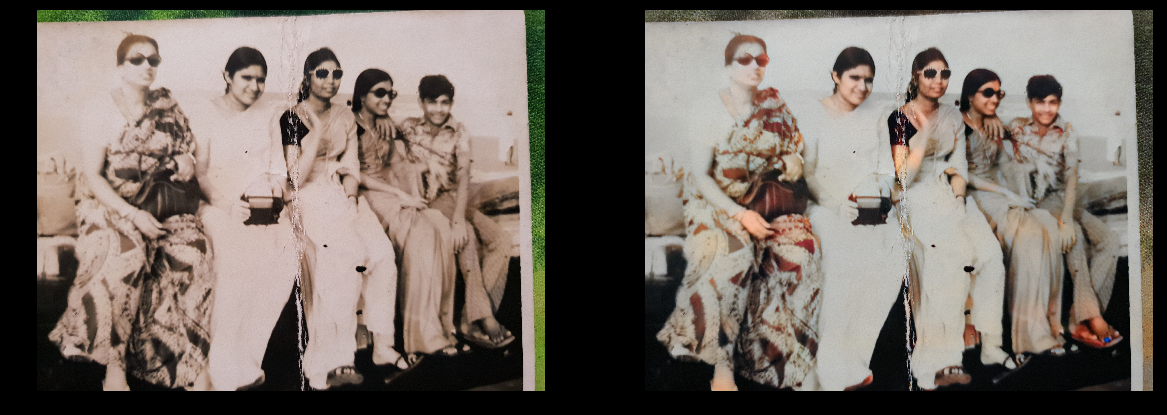

In [0]:
for img in os.listdir("/content/drive/My Drive/Colab Notebooks/old images/"):
  img_path = str("/content/drive/My Drive/Colab Notebooks/old images/") + img
  if os.path.isfile(img_path):
    vis.plot_transformed_image(img_path)

In [0]:
vis.plot_transformed_image('/content/drive/My Drive/Colab Notebooks/old_images3/Dad4.jpg')

In [0]:
 vis.plot_transformed_image('/content/drive/My Drive/Colab Notebooks/old_images2/dad2.jpg')

In [0]:
 vis.plot_transformed_image('/content/drive/My Drive/Colab Notebooks/old images/Amma.jpg')

In [0]:
 vis.plot_transformed_image('/content/drive/My Drive/Colab Notebooks/old images/Tirupathi.jpg')

In [0]:
 vis.plot_transformed_image('/content/drive/My Drive/Colab Notebooks/old images/Tajmahal.jpg')

In [0]:
 vis.plot_transformed_image('/content/drive/My Drive/Colab Notebooks/old images/family1.jpg')

In [0]:
 vis.plot_transformed_image('/content/drive/My Drive/Colab Notebooks/old images/Dad1.jpg')

In [0]:
 vis.plot_transformed_image('/content/drive/My Drive/Colab Notebooks/old images/Brother1.jpg')

In [0]:
 vis.plot_transformed_image('/content/drive/My Drive/Colab Notebooks/old images/marriage.jpg')

In [0]:
 vis.plot_transformed_image('/content/drive/My Drive/Colab Notebooks/old images/mf2o.jpg')

In [0]:
 vis.plot_transformed_image('/content/drive/My Drive/Colab Notebooks/old images/ammamma2.jpg')

In [0]:
Image('/content/drive/My Drive/Colab Notebooks/old images/ammamma.jpg')